In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

sns.set(style="whitegrid")

conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost;'
    'DATABASE=banking_case;'
    'Trusted_Connection=yes;'
)


In [2]:
df = pd.read_sql("SELECT * FROM CUSTOMER", conn)
df

C:\Users\frann\AppData\Local\Temp\ipykernel_22704\4207926139.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM CUSTOMER", conn)


,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,148582864.0,60361788.0,60733248.0,1224996.0,113447528.0,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,64148280.0,22952136.0,34463516.0,6116231.0,200052608.0,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,103340160.0,65267468.0,20305436.0,7907178.0,54813760.0,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,104815752.0,104815752.0,23468502.0,5751365.0,114840232.0,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,48778252.0,44664424.0,12835145.0,3001214.0,167441216.0,0,3,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,2014-10-09,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,108995704.0,53286788.0,65784960.0,1294731.0,123885992.0,1,3,3,2,4
2996,IND40556,Billy Williamson,44,32837,2009-02-05,Dennis Ruiz,European,Paralegal,Mid,Gold,...,13689132.0,5658174.0,9319561.0,2320569.0,27717108.0,1,2,3,2,5
2997,IND72414,Victor Black,70,36088,2009-12-29,Joshua Ryan,American,Statistician IV,Low,Jade,...,21486088.0,15872606.0,3553915.0,3029181.0,50294720.0,2,2,3,2,6
2998,IND46652,Andrew Ford,56,24871,2006-02-13,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,74263024.0,40463824.0,5641133.0,641314.0,153836864.0,3,1,3,2,7


In [3]:
df.shape

(3000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location_ID               3000 non-null   int64  
 4   Joined_Bank               3000 non-null   object 
 5   Banking_Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee_Structure             3000 non-null   object 
 9   Loyalty_Classification    3000 non-null   object 
 10  Estimated_Income          3000 non-null   float64
 11  Superannuation_Savings    3000 non-null   float64
 12  Amount_of_Credit_Cards    3000 non-null   int64  
 13  Credit_Card_Balance       3000 non-null   float64
 14  Bank_Loa

In [5]:
df.head()

,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,148582864.0,60361788.0,60733248.0,1224996.0,113447528.0,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,64148280.0,22952136.0,34463516.0,6116231.0,200052608.0,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,103340160.0,65267468.0,20305436.0,7907178.0,54813760.0,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,104815752.0,104815752.0,23468502.0,5751365.0,114840232.0,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,48778252.0,44664424.0,12835145.0,3001214.0,167441216.0,0,3,1,2,5


In [6]:
#generar estadistica descriptiva para el dataframe
df.describe()

,Age,Location_ID,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,1.713050e+07,2.553160e+06,1.463667,3.176207e+05,5.913862e+07,6.715602e+07,3.210929e+07,2.329084e+07,2.988353e+06,8.667598e+07,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,1.119358e+07,1.625995e+06,0.676387,2.497095e+05,4.575570e+07,6.457169e+07,2.820796e+07,2.300078e+07,2.310992e+06,6.412303e+07,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,1.591948e+06,1.482030e+05,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+03,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,8.290660e+06,1.251378e+06,1.000000,1.236630e+05,2.396281e+07,2.044004e+07,1.199475e+07,7.479440e+06,1.191654e+06,3.748251e+07,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,1.423135e+07,2.235736e+06,1.000000,2.560805e+05,4.797934e+07,4.633165e+07,2.428157e+07,1.640866e+07,2.434119e+06,7.113146e+07,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,2.422903e+07,3.546474e+06,2.000000,4.522632e+05,8.258131e+07,9.427546e+07,4.348749e+07,3.155750e+07,4.196639e+06,1.185110e+08,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,5.223302e+07,7.596390e+06,3.000000,1.399199e+06,2.667557e+08,3.890598e+08,1.969923e+08,1.724118e+08,1.247049e+07,3.825962e+08,3.000000,5.000000,4.000000,2.000000,22.000000


In [7]:
df['Estimated_Income'].describe()


count    3.000000e+03
mean     1.713050e+07
std      1.119358e+07
min      1.591948e+06
25%      8.290660e+06
50%      1.423135e+07
75%      2.422903e+07
max      5.223302e+07
Name: Estimated_Income, dtype: float64

In [8]:
df['Income Band'] = pd.qcut(
    df['Estimated_Income'],
    q=[0, 0.25, 0.75, 1],
    labels=['Low', 'Mid', 'High']
)

<Axes: >

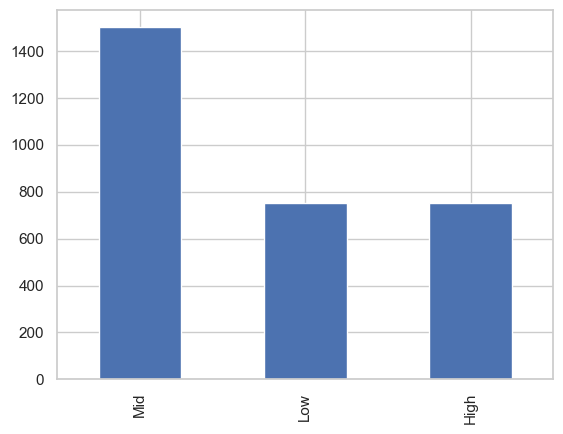

In [9]:
df['Income Band'].value_counts()
df['Income Band'].value_counts().plot(kind='bar')

In [10]:
# Examinar la distribucion de categorias unicas en columnas categoricas

categorical_cols = [
    "BRId",
    "GenderId",
    "IAId",
    "Amount_of_Credit_Cards",
    "Nationality",
    "Occupation",
    "Fee_Structure",
    "Loyalty_Classification",
    "Properties_Owned",
    "Risk_Weighting",
    "Income Band"
]

for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())


Value counts for 'BRId':


3    1352
1     660
2     495
4     493
Name: BRId, dtype: int64


Value counts for 'GenderId':


2    1512
1    1488
Name: GenderId, dtype: int64


Value counts for 'IAId':


1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: IAId, dtype: int64


Value counts for 'Amount_of_Credit_Cards':


1    1922
2     765
3     313
Name: Amount_of_Credit_Cards, dtype: int64


Value counts for 'Nationality':


European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64


Value counts for 'Occupation':


Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64


Value counts for 'Fee_Structure':


High    1476
Mid      962
Low      562
Name: Fee_Structure, dtype: int64


Value counts for 'Loyalty_Classification':


Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty_Classification, dtype: int64


Value counts for 'Properties_Owned':


2    777
1    776
3    742
0    705
Name: Properties_Owned, dtype: int64


Value counts for 'Risk_Weighting':


2    1222
1     836
3     460
4     322
5     160
Name: Risk_Weighting, dtype: int64


Value counts for 'Income Band':


Mid     1500
Low      750
High     750
Name: Income Band, dtype: int64

In [11]:
# Chequeamos los missing values

missing_values = df.isnull().sum()
print("Missing values por columnas:\n", missing_values)

Missing values por columnas:
 Client_ID                   0
Name                        0
Age                         0
Location_ID                 0
Joined_Bank                 0
Banking_Contact             0
Nationality                 0
Occupation                  0
Fee_Structure               0
Loyalty_Classification      0
Estimated_Income            0
Superannuation_Savings      0
Amount_of_Credit_Cards      0
Credit_Card_Balance         0
Bank_Loans                  0
Bank_Deposits               0
Checking_Accounts           0
Saving_Accounts             0
Foreign_Currency_Account    0
Business_Lending            0
Properties_Owned            0
Risk_Weighting              0
BRId                        0
GenderId                    0
IAId                        0
Income Band                 0
dtype: int64


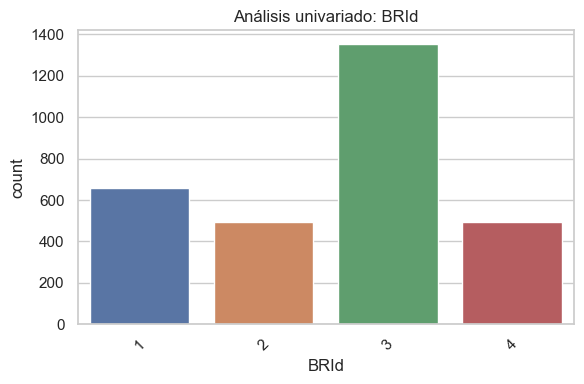

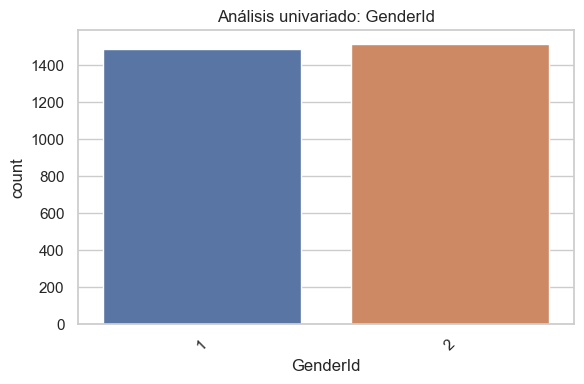

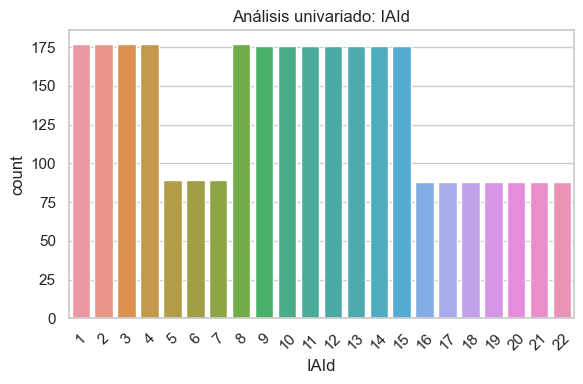

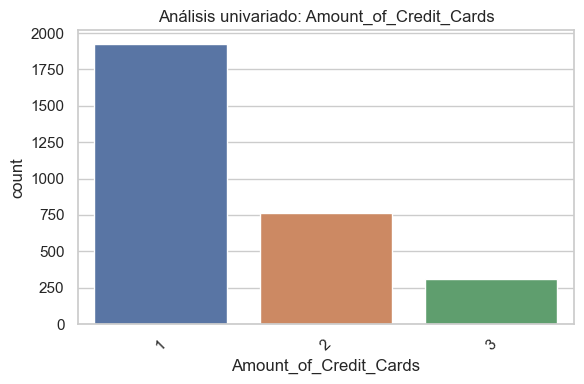

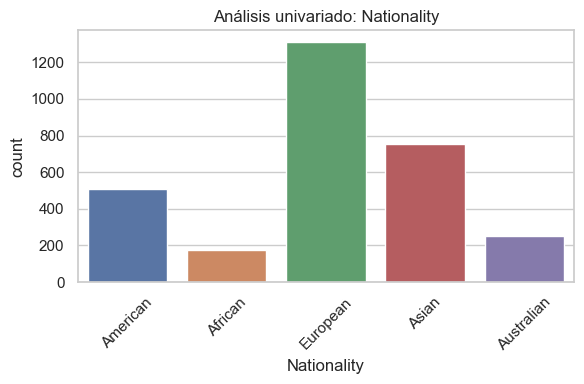

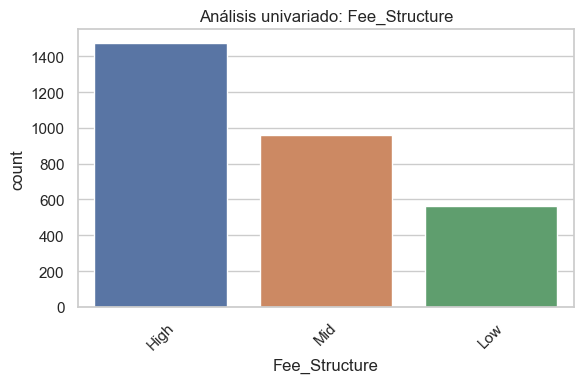

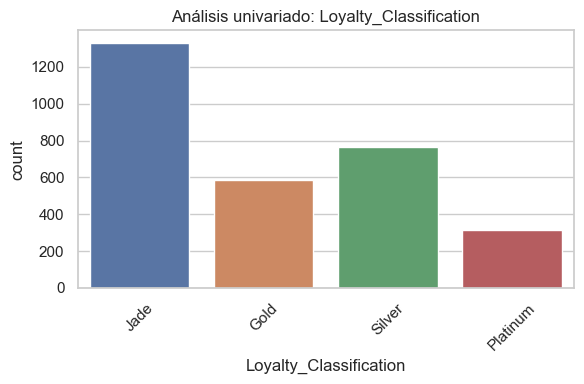

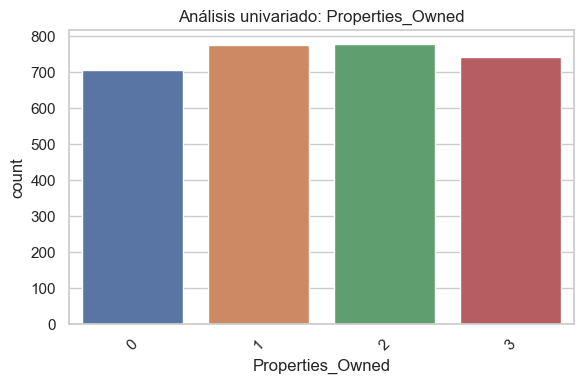

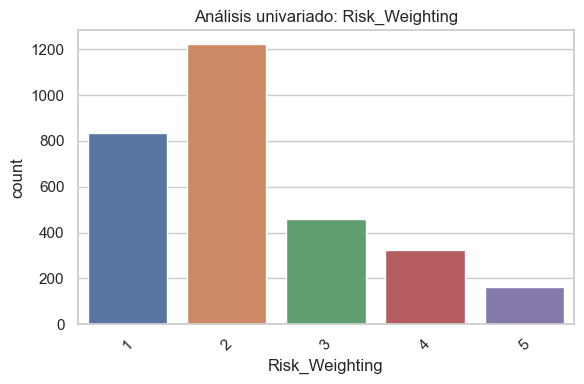

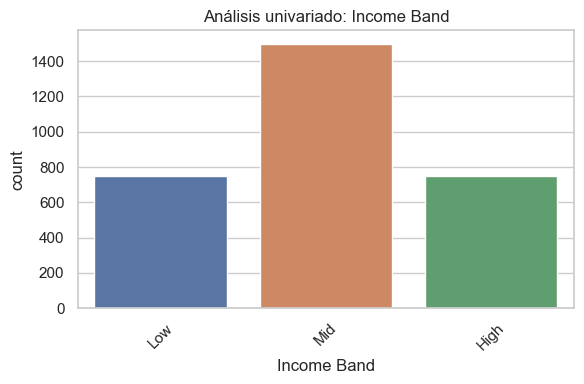

In [16]:
 
categorical_cols = [
    "BRId",
    "GenderId",
    "IAId",
    "Amount_of_Credit_Cards",
    "Nationality",
    #"Occupation",
    "Fee_Structure",
    "Loyalty_Classification",
    "Properties_Owned",
    "Risk_Weighting",
    "Income Band"
]

for i, predictor in enumerate(categorical_cols):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=predictor)
    plt.xticks(rotation=45)
    plt.title(f"Análisis univariado: {predictor}")
    plt.tight_layout()
    plt.show()

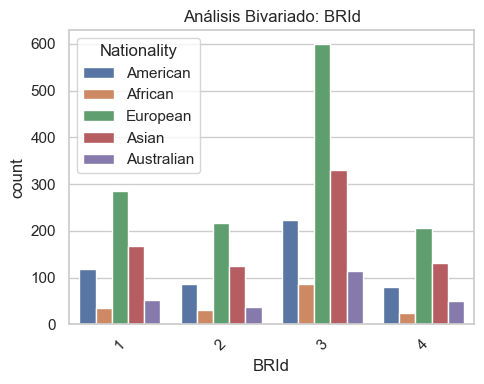

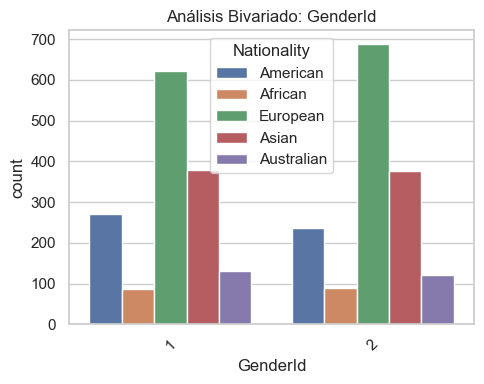

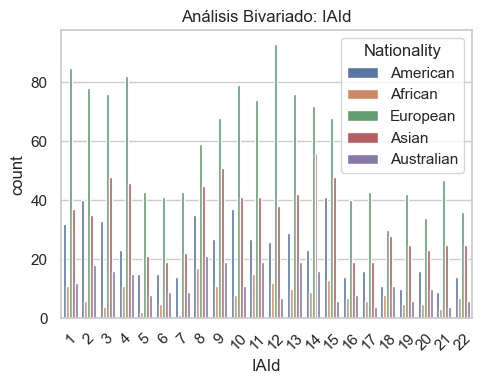

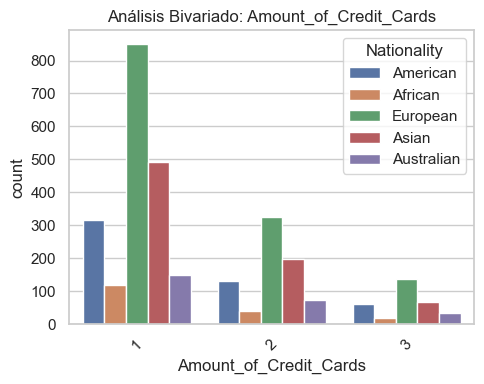

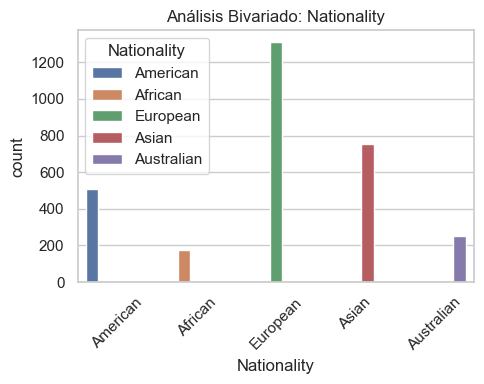

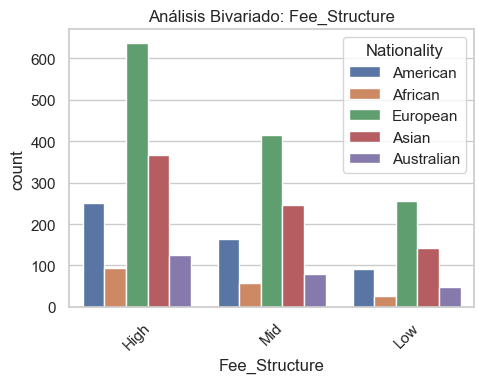

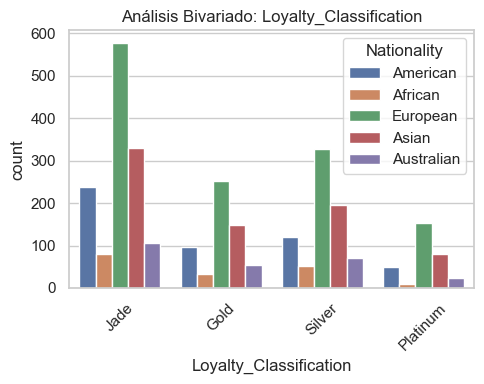

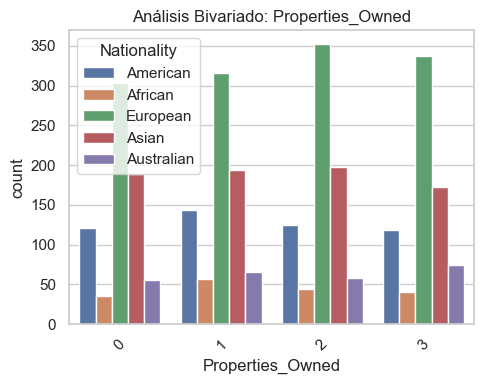

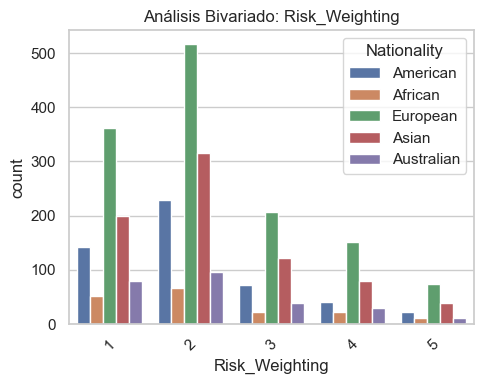

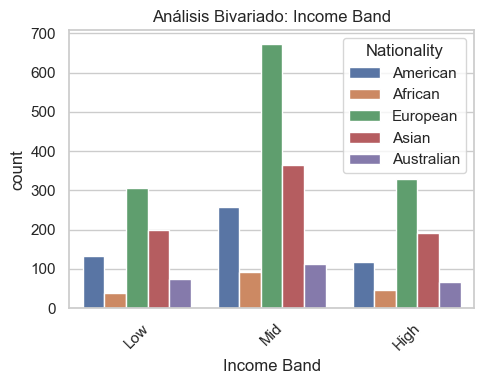

In [13]:
 
categorical_cols = [
    "BRId",
    "GenderId",
    "IAId",
    "Amount_of_Credit_Cards",
    "Nationality",
    #"Occupation",
    "Fee_Structure",
    "Loyalty_Classification",
    "Properties_Owned",
    "Risk_Weighting",
    "Income Band"
]

for i, predictor in enumerate(categorical_cols):
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=predictor, hue='Nationality')   #hue='GenderId'
    plt.xticks(rotation=45)
    plt.title(f"Análisis Bivariado: {predictor}")
    plt.tight_layout()
    plt.show()

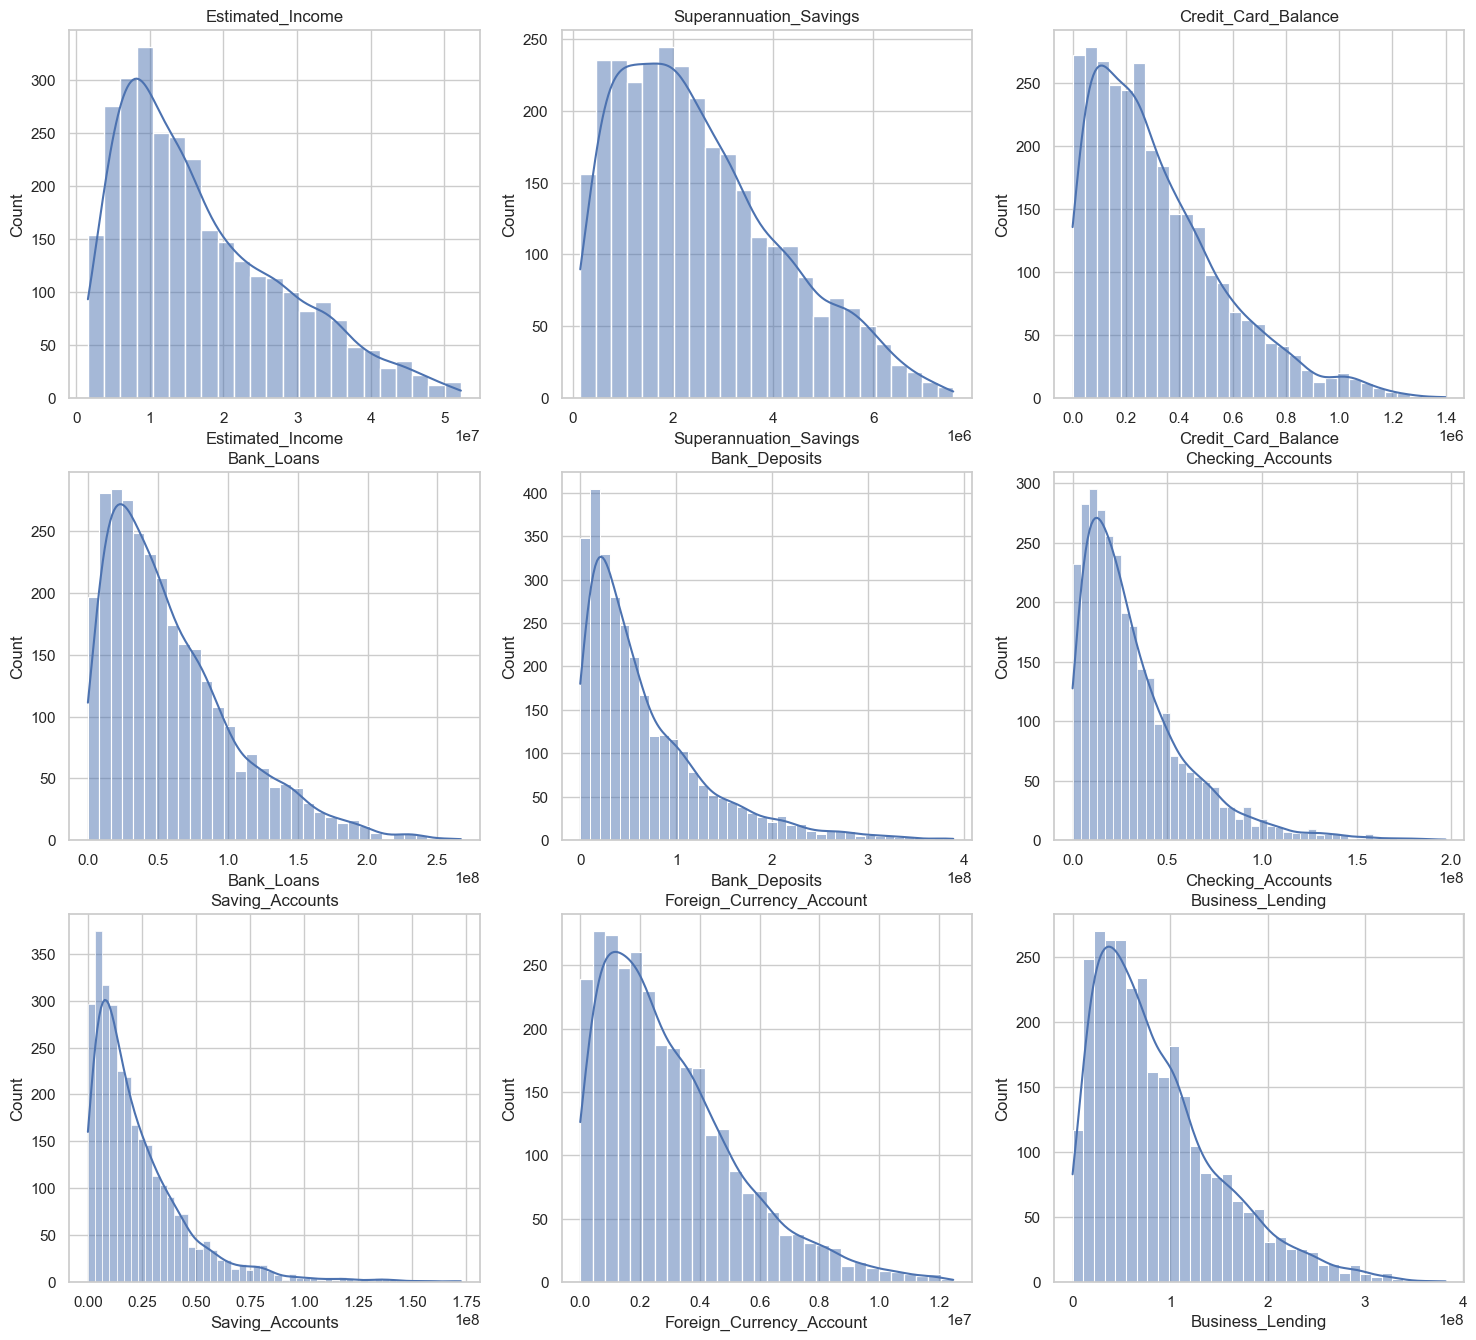

In [14]:
# Analisis numerico

numerical_cols = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account', 'Business_Lending']

# Análisis univariado y visualización
plt.figure(figsize=(18,22))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.show()

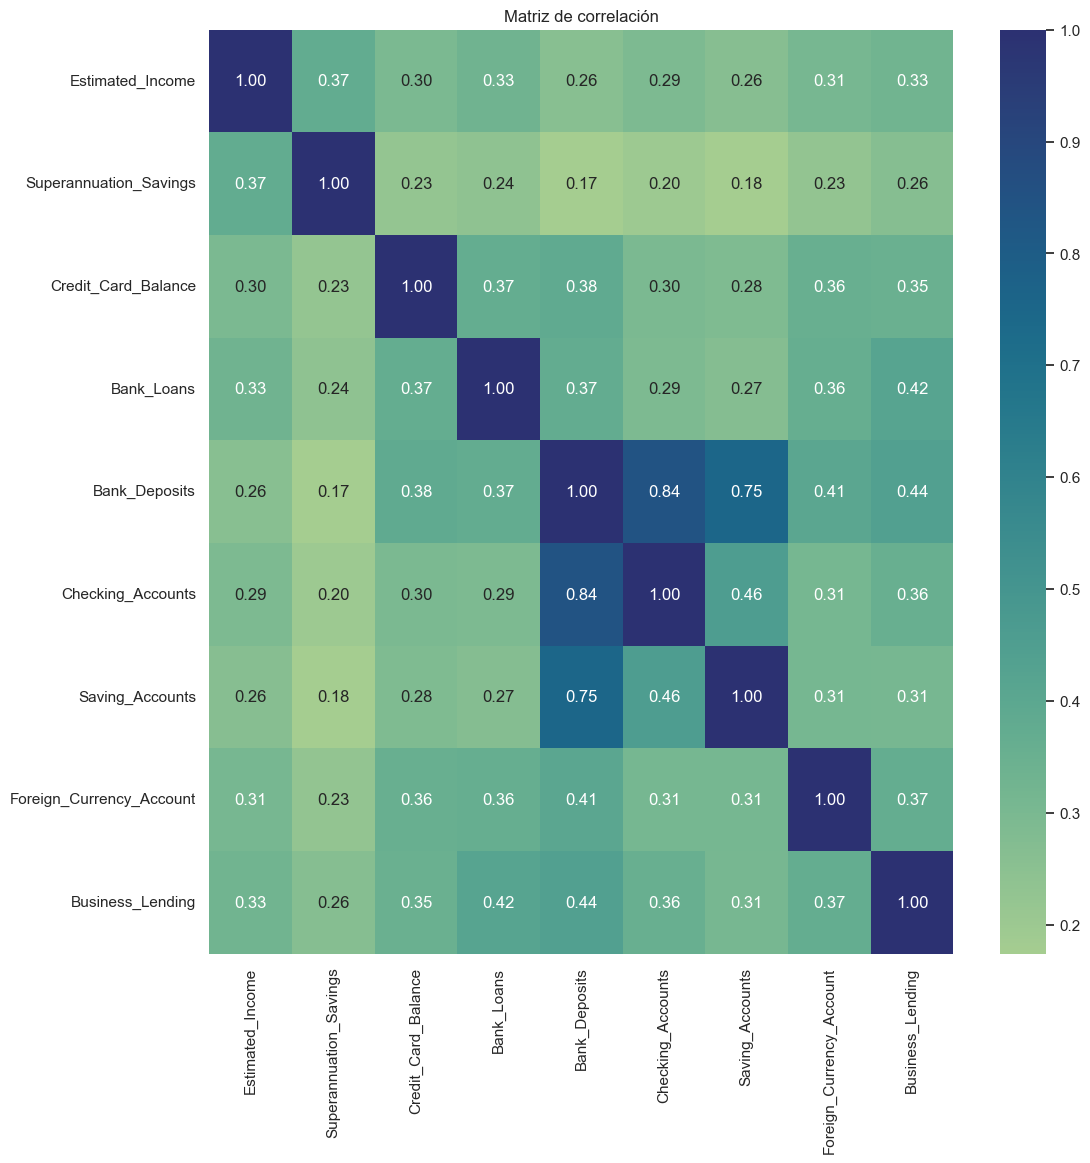

In [15]:
numerical_cols = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account', 'Business_Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## Conclusiones del EDA

El análisis exploratorio permitió identificar patrones relevantes en el comportamiento financiero de los clientes. Se observaron fuertes correlaciones entre los saldos bancarios (Bank_Deposits, Checking_Accounts y Saving_Accounts), lo que sugiere posibles problemas de redundancia y multicolinealidad entre estas variables.

El Estimated_Income mostró correlaciones moderadas a bajas con los productos de ahorro y depósitos, indicando que el nivel de ingreso no explica por sí solo el comportamiento financiero de los clientes.

Asimismo, se detectó una relación positiva entre distintos productos de crédito, reflejando un uso combinado de financiamiento. El Credit_Card_Balance presentó correlaciones moderadas con la mayoría de las variables, lo que sugiere un uso transversal de la tarjeta de crédito.

Estos hallazgos servirán como base para la selección y transformación de variables en etapas posteriores del análisis y modelado.